# KPMG Virtual Internship

For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation.

### Import important libraries which will be used in program.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

### Importing datasets into pandas dataframe.

In [2]:
cus_demo = pd.read_csv(r"C:\Users\lenovo\Downloads\KPMG Virtual Internship\KPMG_Customer_Demographic.csv")
cus_demo.head(3)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,12-10-53,67,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Eli,Bockman,Male,81,16-12-80,40,Administrative Officer,Financial Services,Mass Customer,N,Yes,16


In [3]:
cus_add = pd.read_csv(r"C:\Users\lenovo\Downloads\KPMG Virtual Internship\KPMG_Customer_Address.csv")
cus_add.head(3)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,NSW,Australia,10
2,2,6 Meadow Vale Court,2153,NSW,Australia,10


In [4]:
trans = pd.read_csv(r"C:\Users\lenovo\Downloads\KPMG Virtual Internship\KPMG_Transactions.csv")
trans.head(3)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price($),standard_cost($),product_first_sold_date,Profit($),Profit_Margin(%)
1,2,3,3120,21-05-17,TRUE,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03-03-14,1702.55,537.76
2,5,78,787,01-10-17,TRUE,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10-08-15,1055.82,248.82


## Data Cleaning

### Assign valid column name.

In [5]:
cus_demo = cus_demo.rename(columns=cus_demo.iloc[0])  
cus_demo.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,12-10-53,67,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Eli,Bockman,Male,81,16-12-80,40,Administrative Officer,Financial Services,Mass Customer,N,Yes,16


In [6]:
cus_add = cus_add.rename(columns=cus_add.iloc[0]) 
cus_add.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,NSW,Australia,10
2,2,6 Meadow Vale Court,2153,NSW,Australia,10


In [7]:
trans = trans.rename(columns=trans.iloc[0])
trans.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price($),standard_cost($),product_first_sold_date,Profit($),Profit_Margin(%)
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price($),standard_cost($),product_first_sold_date,Profit($),Profit_Margin(%)
1,2,3,3120,21-05-17,TRUE,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03-03-14,1702.55,537.76
2,5,78,787,01-10-17,TRUE,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10-08-15,1055.82,248.82


### Remove first row which consists of column name.

In [8]:
cus_demo = cus_demo.iloc[1:,]
cus_demo.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,12-10-53,67,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Eli,Bockman,Male,81,16-12-80,40,Administrative Officer,Financial Services,Mass Customer,N,Yes,16


In [9]:
cus_add = cus_add.iloc[1:,]
cus_add.head(2)

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,NSW,Australia,10
2,2,6 Meadow Vale Court,2153,NSW,Australia,10


In [10]:
trans = trans.iloc[1:,]
trans.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price($),standard_cost($),product_first_sold_date,Profit($),Profit_Margin(%)
1,2,3,3120,21-05-17,TRUE,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03-03-14,1702.55,537.76
2,5,78,787,01-10-17,TRUE,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10-08-15,1055.82,248.82


### Change datatype of Customer Demographic column to numeric.

In [11]:
cus_demo["Age"] = pd.to_numeric(cus_demo["Age"])    
cus_demo["tenure"] = pd.to_numeric(cus_demo["tenure"])    
cus_demo["past_3_years_bike_related_purchases"] = pd.to_numeric(cus_demo["past_3_years_bike_related_purchases"])  
cus_demo.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,12-10-53,67,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Eli,Bockman,Male,81,16-12-80,40,Administrative Officer,Financial Services,Mass Customer,N,Yes,16


### Insert new column Age_Category from Age column in Customer Demographic.

In [12]:
##Add new Age_Category column which divides 'Age' in different categories like adult, young adult and senior citizen.






### Remove NaN value in job_industry_category column and store in separate dataframe.

In [13]:
cus_demo_nan_job = cus_demo.dropna(subset = ['job_industry_category'], how ='all')
cus_demo_nan_job.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,12-10-53,67,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Eli,Bockman,Male,81,16-12-80,40,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
3,3,Arlin,Dearle,Male,61,20-01-54,67,Recruiting Manager,Property,Mass Customer,N,Yes,15
6,9,Mala,Lind,Female,97,10-03-73,47,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8
7,10,Fiorenze,Birdall,Female,49,11-10-88,32,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20


### Change datatype of column in Transactions Dataset

In [14]:
trans["Profit($)"] = pd.to_numeric(trans["Profit($)"])
trans["Profit_Margin(%)"] = pd.to_numeric(trans["Profit_Margin(%)"])
trans["list_price($)"] = pd.to_numeric(trans["list_price($)"])
trans["standard_cost($)"] = pd.to_numeric(trans["standard_cost($)"])

## Data Exploration & Visualization

## Cutomer Address Dataframe 

### Which states has more number of bike customers.

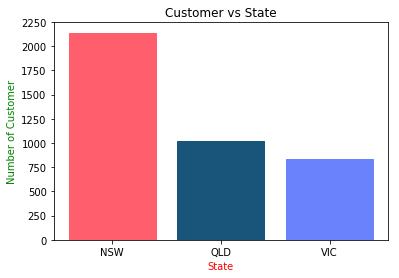

In [15]:
bar_graph1= plt.bar(cus_add.state.unique(), cus_add["state"].value_counts())

bar_graph1[0].set_color('#FF5F6D')
bar_graph1[1].set_color('#19547b')
bar_graph1[2].set_color('#6A82FB')

plt.ylabel('Number of Customer', color='g')
plt.xlabel('State', color='r')
plt.title("Customer vs State")
plt.show()

##### According to data, New South Wales(NSW) people purchased more bikes and cycles.Sprocket Central Pty Ltd have more customer base in NSW and lesser in VIC. Their future customer is more likely from NSW.

## Customer Demographic Dataframe 

### Which gender purchases more bikes.

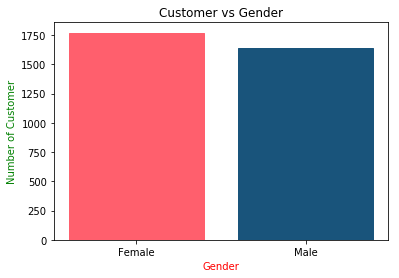

In [16]:
bar_graph2 = plt.bar(cus_demo.gender.unique(), cus_demo["gender"].value_counts() )

bar_graph2[0].set_color('#FF5F6D')
bar_graph2[1].set_color('#19547b')

plt.ylabel('Number of Customer', color ='g')
plt.xlabel('Gender', color='r')
plt.title("Customer vs Gender")
plt.show()

#### Sprocket Central Pty Ltd company has slightly more female customers than male. They should increase their base between female through female based advertisment or launch more female oriented offers on new purchase.

### Exploring bikes customers who owns car.

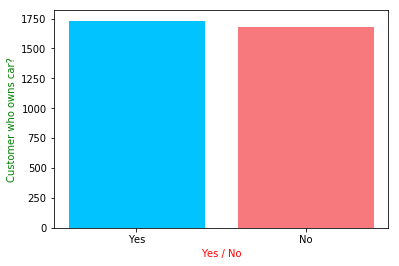

In [17]:
bar_graph3 = plt.bar(cus_demo.owns_car.unique(), cus_demo["owns_car"].value_counts())

bar_graph3[0].set_color('#00c3ff')
bar_graph3[1].set_color('#f7797d')

plt.ylabel('Customer who owns car?', color ='g')
plt.xlabel('Yes / No', color='r')
plt.show()

#### According to data, most of the customers who purchases bike and cycling accessories from Sprocket Central Pty Ltd have car. That means most customers are financially strong.

###  Which wealth segment purchases more bikes.

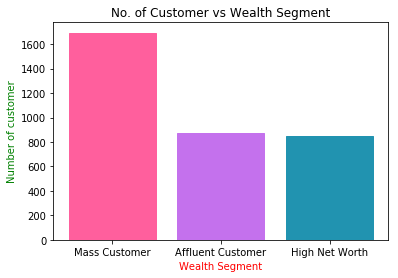

In [18]:
bar_graph4 = plt.bar(cus_demo.wealth_segment.unique(), cus_demo["wealth_segment"].value_counts())

bar_graph4[0].set_color('#FF5F9D')
bar_graph4[1].set_color('#c471ed')
bar_graph4[2].set_color('#2193b0')

plt.ylabel('Number of customer', color='g')
plt.xlabel('Wealth Segment', color='r')
plt.title("No. of Customer vs Wealth Segment")
plt.show()

#### A large number customers who purchased bikes and cycling accessories from Sprocket Central Pty Ltd belongs to "Mass customer" wealth segment category. 

### Which gender purchased more bikes in past 3 years.

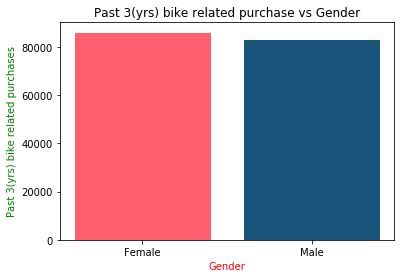

In [19]:
results1 = cus_demo.groupby("gender").sum()
bar_graph5 = plt.bar(cus_demo.gender.unique(), results1["past_3_years_bike_related_purchases"])

bar_graph5[0].set_color('#FF5F6D')
bar_graph5[1].set_color('#19547b')

plt.ylabel('Past 3(yrs) bike related purchases', color='g')
plt.xlabel('Gender', color='r')
plt.title("Past 3(yrs) bike related purchase vs Gender")
plt.show()

#### In past 3 years female purchased more bikes related accessories from Sprocket Central Pty Ltd. They should launch some exclusive products for female customers to increase their sales.

### Customers belongs to which job industry.

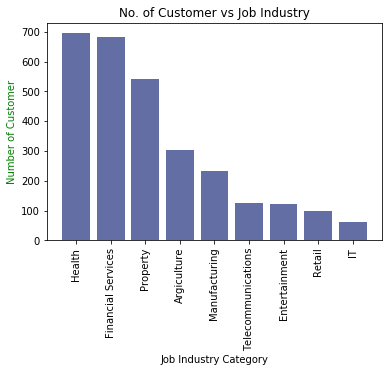

In [20]:
plt.bar(cus_demo_nan_job.job_industry_category.unique(), cus_demo_nan_job["job_industry_category"].value_counts(), color='#636fa4')

plt.xticks(rotation = "vertical", size=10)
plt.ylabel('Number of Customer', color='g')
plt.xlabel('Job Industry Category')
plt.title("No. of Customer vs Job Industry")
plt.show()

#### According to data, most of the customers who purchases bike and cycling accessories from Sprocket Central Pty Ltd belongs to Health and Financial Services. That means the chances of next 1000 customers belonging to these sectors is very high. So marketing team should target these sector to drive the most value for the organisation..

## Transactions Dataset

### Which brand is most selling brand.

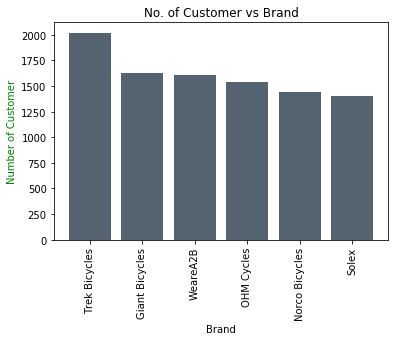

In [21]:
plt.bar(trans.brand.unique(), trans["brand"].value_counts(), color='#556270')

plt.xticks(rotation = "vertical", size=10)
plt.ylabel('Number of Customer', color='g')
plt.xlabel('Brand')
plt.title("No. of Customer vs Brand")
plt.show()

### Which size of product is most selling.

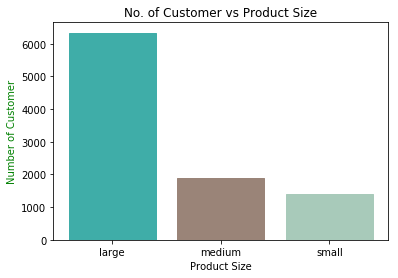

In [22]:
bar_graph6 = plt.bar(trans.product_size.unique(), trans["product_size"].value_counts(), color='#636fa4')

bar_graph6[0].set_color('#3fada8')
bar_graph6[1].set_color('#9a8478')
bar_graph6[2].set_color('#a8caba')

plt.ylabel('Number of Customer', color='g')
plt.xlabel('Product Size')
plt.title("No. of Customer vs Product Size")
plt.show()

### Which brand has higher profit margin.

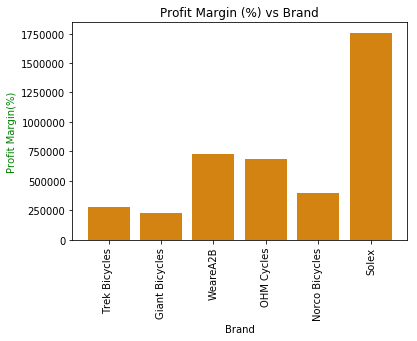

In [23]:
results2 = trans.groupby("brand").sum()
plt.bar(trans.brand.unique(), results2["Profit_Margin(%)"], color='#d38312')

plt.xticks(rotation = 'vertical')
plt.ylabel('Profit Margin(%)', color='g')
plt.xlabel('Brand')
plt.title("Profit Margin (%) vs Brand")
plt.show()

### Which brand is most profitable.

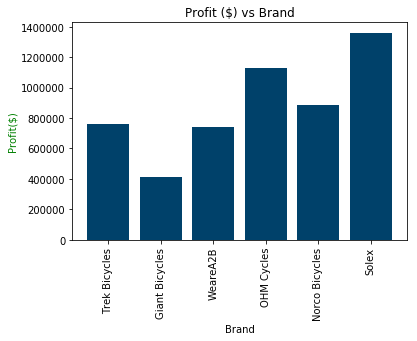

In [24]:
results2 = trans.groupby("brand").sum()
plt.bar(trans.brand.unique(), results2["Profit($)"], color='#00416a')

plt.xticks(rotation = 'vertical')
plt.ylabel('Profit($)', color='g')
plt.xlabel('Brand')
plt.title("Profit ($) vs Brand")
plt.show()

### Realtion between Selling Price and Standard Price of a bike brand.

In [25]:
brand_group = trans.groupby('brand')
list_price = brand_group.sum()['list_price($)']

brands = [product for product, df in brand_group]


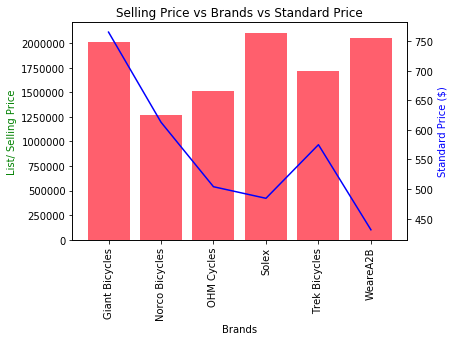

In [26]:
##To prove some products ordered more beacuse of their price.
prices = trans.groupby('brand').mean()['standard_cost($)']

fig, ax1=plt.subplots()

ax2 = ax1.twinx()
ax1.bar(brands, list_price, color = '#FF5F6D')
ax2.plot(brands, prices, 'b-')

ax1.set_xlabel('Brands')
ax1.set_ylabel('List/ Selling Price', color ='g')
ax2.set_ylabel('Standard Price ($)', color='b')
ax1.set_xticklabels(brands, rotation = 'vertical', size=10)
plt.title("Selling Price vs Brands vs Standard Price")
plt.show()